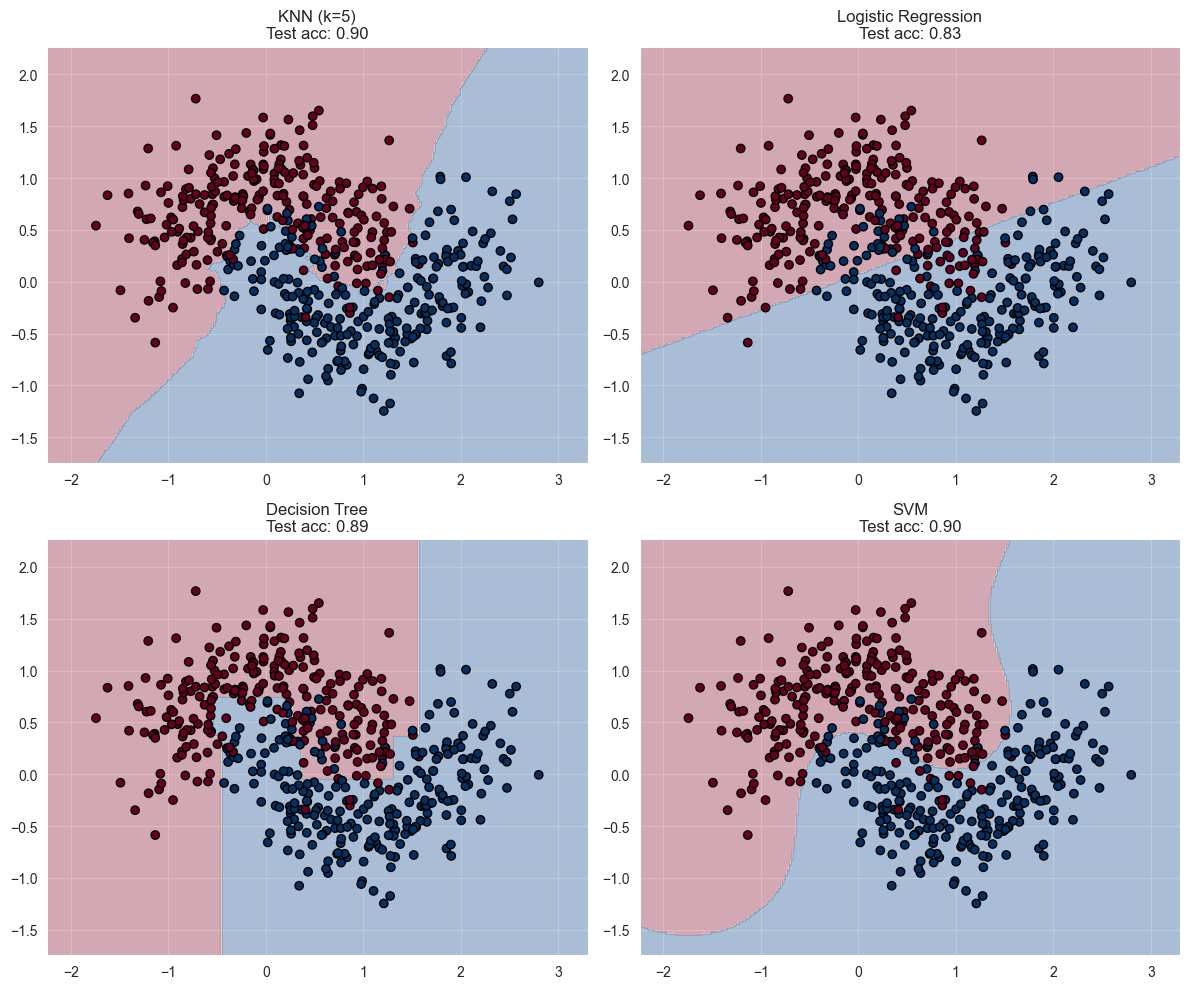

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Dane
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Funkcja do granic decyzyjnych
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor="k")
    ax.set_title(title)

# Modele do porównania
models = {
    "KNN (k=5)": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1))
}

# Rysowanie
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axes.ravel(), models.items()):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    plot_decision_boundary(model, X, y, ax, f"{name}\nTest acc: {score:.2f}")

plt.tight_layout()
plt.show()
